In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pickle


In [2]:
file_path = '/Users/ceejay/Desktop/Azubi Technical Assessment/data/bank-additional-full.csv'
df = pd.read_csv(file_path, sep=';')  # The dataset uses ';' as separator


In [3]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# DATA Cleaning, EDA & Featured Engineering

In [4]:
# Display the first few rows of the dataset
df.shape

(41188, 21)

In [5]:

df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
#display the first few rows of the dataset
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
# Check for missing values and placeholder values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [9]:
# Check how many 'unknown' values exist in each column (used as placeholder for missing)
unknown_counts = (df == 'unknown').sum()
print("Counts of 'unknown' values in each column:\n", unknown_counts)

Counts of 'unknown' values in each column:
 age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


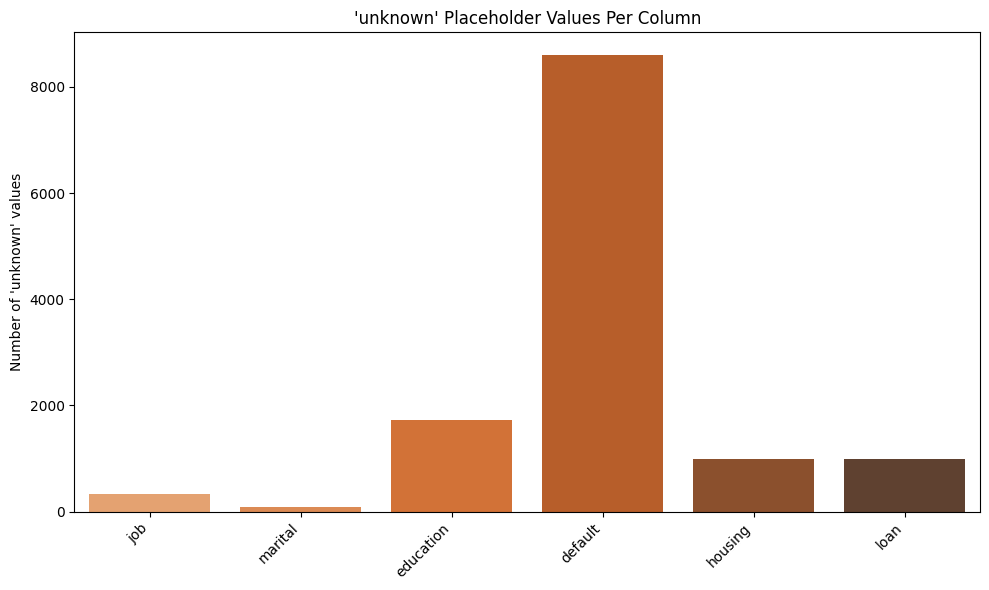

In [10]:
# Filter columns that actually contain 'unknown' values
unknown_counts_filtered = unknown_counts[unknown_counts > 0]

# Visualize 'unknown' value counts per column
plt.figure(figsize=(10, 6))
sns.barplot(x=unknown_counts_filtered.index, y=unknown_counts_filtered.values, palette='Oranges_d')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of 'unknown' values")
plt.title("'unknown' Placeholder Values Per Column")
plt.tight_layout()
plt.show()


In [11]:
# Replace 'unknown' strings with 'Unknown' category
df_cleaned = df.replace('unknown', 'Unknown')

# Verify the replacement
unknown_check_after = (df_cleaned == 'unknown').sum().sum()
Unknown_check = (df_cleaned == 'Unknown').sum()

unknown_check_after, Unknown_check[Unknown_check > 0]

(0,
 job           330
 marital        80
 education    1731
 default      8597
 housing       990
 loan          990
 dtype: int64)

In [12]:
# Investigate the distribution of 'pdays' values
pdays_summary = df_cleaned['pdays'].value_counts().sort_index()

# Count how many entries have pdays = 999
pdays_999_count = (df_cleaned['pdays'] == 999).sum()
pdays_total = df_cleaned.shape[0]
pdays_999_percent = pdays_999_count / pdays_total * 100

pdays_summary.head(10), pdays_999_count, pdays_999_percent

(0     15
 1     26
 2     61
 3    439
 4    118
 5     46
 6    412
 7     60
 8     18
 9     64
 Name: pdays, dtype: int64,
 39673,
 96.32174419733903)

# Featured Engineering

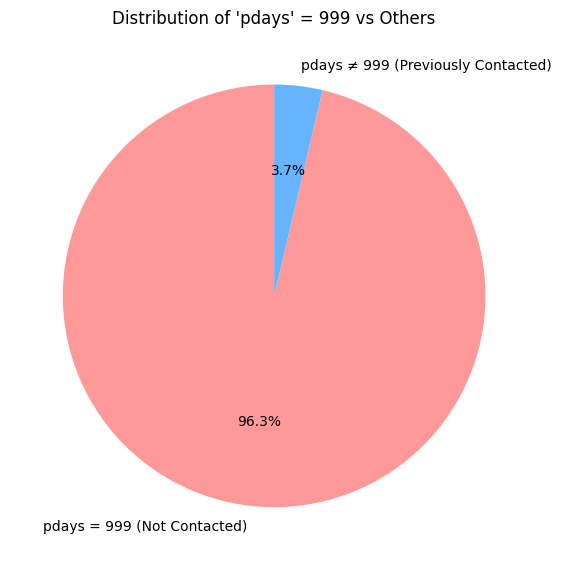

In [13]:
# Additionally show the proportion of 999 visually
plt.figure(figsize=(6, 6))
plt.pie(
    [pdays_999_count, pdays_total - pdays_999_count],
    labels=['pdays = 999 (Not Contacted)', 'pdays ≠ 999 (Previously Contacted)'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999', '#66b3ff']
)
plt.title("Distribution of 'pdays' = 999 vs Others")
plt.tight_layout()
plt.show()

In [14]:
# Create a new binary column indicating whether the client was previously contacted
df_cleaned['previous_contacted'] = df_cleaned['pdays'].apply(lambda x: 0 if x == 999 else 1)

# Preview changes
df_cleaned[['pdays', 'previous_contacted']].head(10)


,pdays,previous_contacted
0,999,0
1,999,0
2,999,0
3,999,0
4,999,0
5,999,0
6,999,0
7,999,0
8,999,0
9,999,0


In [15]:
# Create new feature: Call Efficiency (duration / campaign)
# Avoid division by zero
df_cleaned['call_efficiency'] = df_cleaned.apply(
    lambda row: row['duration'] / row['campaign'] if row['campaign'] != 0 else 0, axis=1
)

# Create new feature: Debt Load (1 if has housing or personal loan, else 0)
df_cleaned['debt_load'] = df_cleaned.apply(
    lambda row: 1 if row['housing'] == 'yes' or row['loan'] == 'yes' else 0, axis=1
)

# Show the first few rows of the new features
df_cleaned[['duration', 'campaign', 'call_efficiency', 'housing', 'loan', 'debt_load']].head()


,duration,campaign,call_efficiency,housing,loan,debt_load
0,261,1,261.0,no,no,0
1,149,1,149.0,no,no,0
2,226,1,226.0,yes,no,1
3,151,1,151.0,no,no,0
4,307,1,307.0,no,yes,1


In [16]:
# Check for duplicate rows in the dataset
duplicate_count = df_cleaned.duplicated().sum()

duplicate_count


12

In [17]:
# Remove duplicate records
df_cleaned = df_cleaned.drop_duplicates()

# Confirm removal
new_shape = df_cleaned.shape

new_shape


(41176, 24)

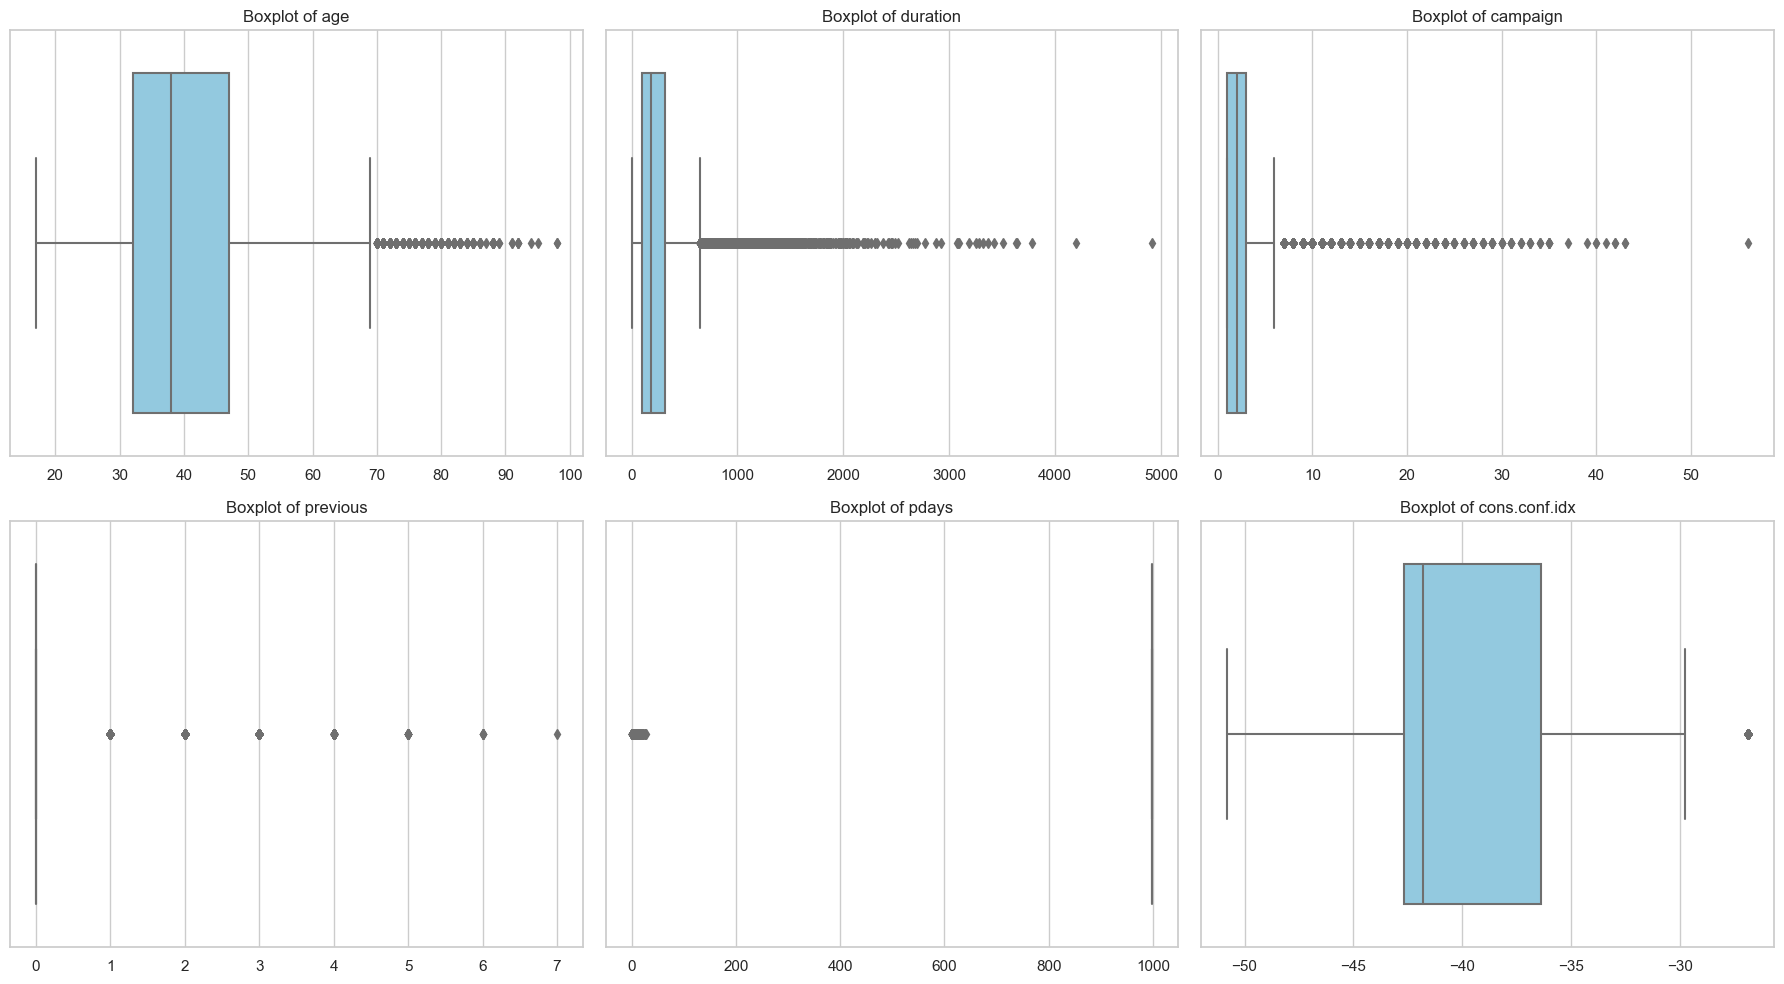

In [ ]:
# We'll visualize boxplots for numeric columns with outliers
outlier_cols = ['age', 'duration', 'campaign', 'previous', 'pdays', 'cons.conf.idx']

# Create boxplots for each column to show outliers
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(outlier_cols):
    sns.boxplot(data=df_cleaned, x=col, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()




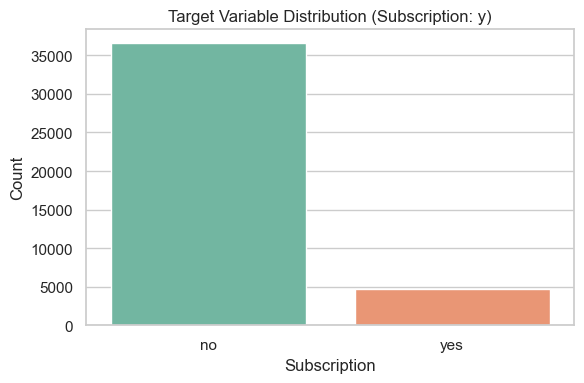

(                age     job  marital          education default housing  \
 count   41188.00000   41188    41188              41188   41188   41188   
 unique          NaN      12        4                  8       3       3   
 top             NaN  admin.  married  university.degree      no     yes   
 freq            NaN   10422    24928              12168   32588   21576   
 mean       40.02406     NaN      NaN                NaN     NaN     NaN   
 std        10.42125     NaN      NaN                NaN     NaN     NaN   
 min        17.00000     NaN      NaN                NaN     NaN     NaN   
 25%        32.00000     NaN      NaN                NaN     NaN     NaN   
 50%        38.00000     NaN      NaN                NaN     NaN     NaN   
 75%        47.00000     NaN      NaN                NaN     NaN     NaN   
 max        98.00000     NaN      NaN                NaN     NaN     NaN   
 
          loan   contact  month day_of_week  ...      campaign         pdays  \
 count

In [ ]:
# Set visual style
sns.set(style="whitegrid")

# 1. Summary statistics
summary_stats = df.describe(include='all')

# Check class balance of the target variable
class_balance = df['y'].value_counts(normalize=True)

# Visualize target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='y', palette='Set2')
plt.title('Target Variable Distribution (Subscription: y)')
plt.xlabel('Subscription')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

summary_stats, class_balance


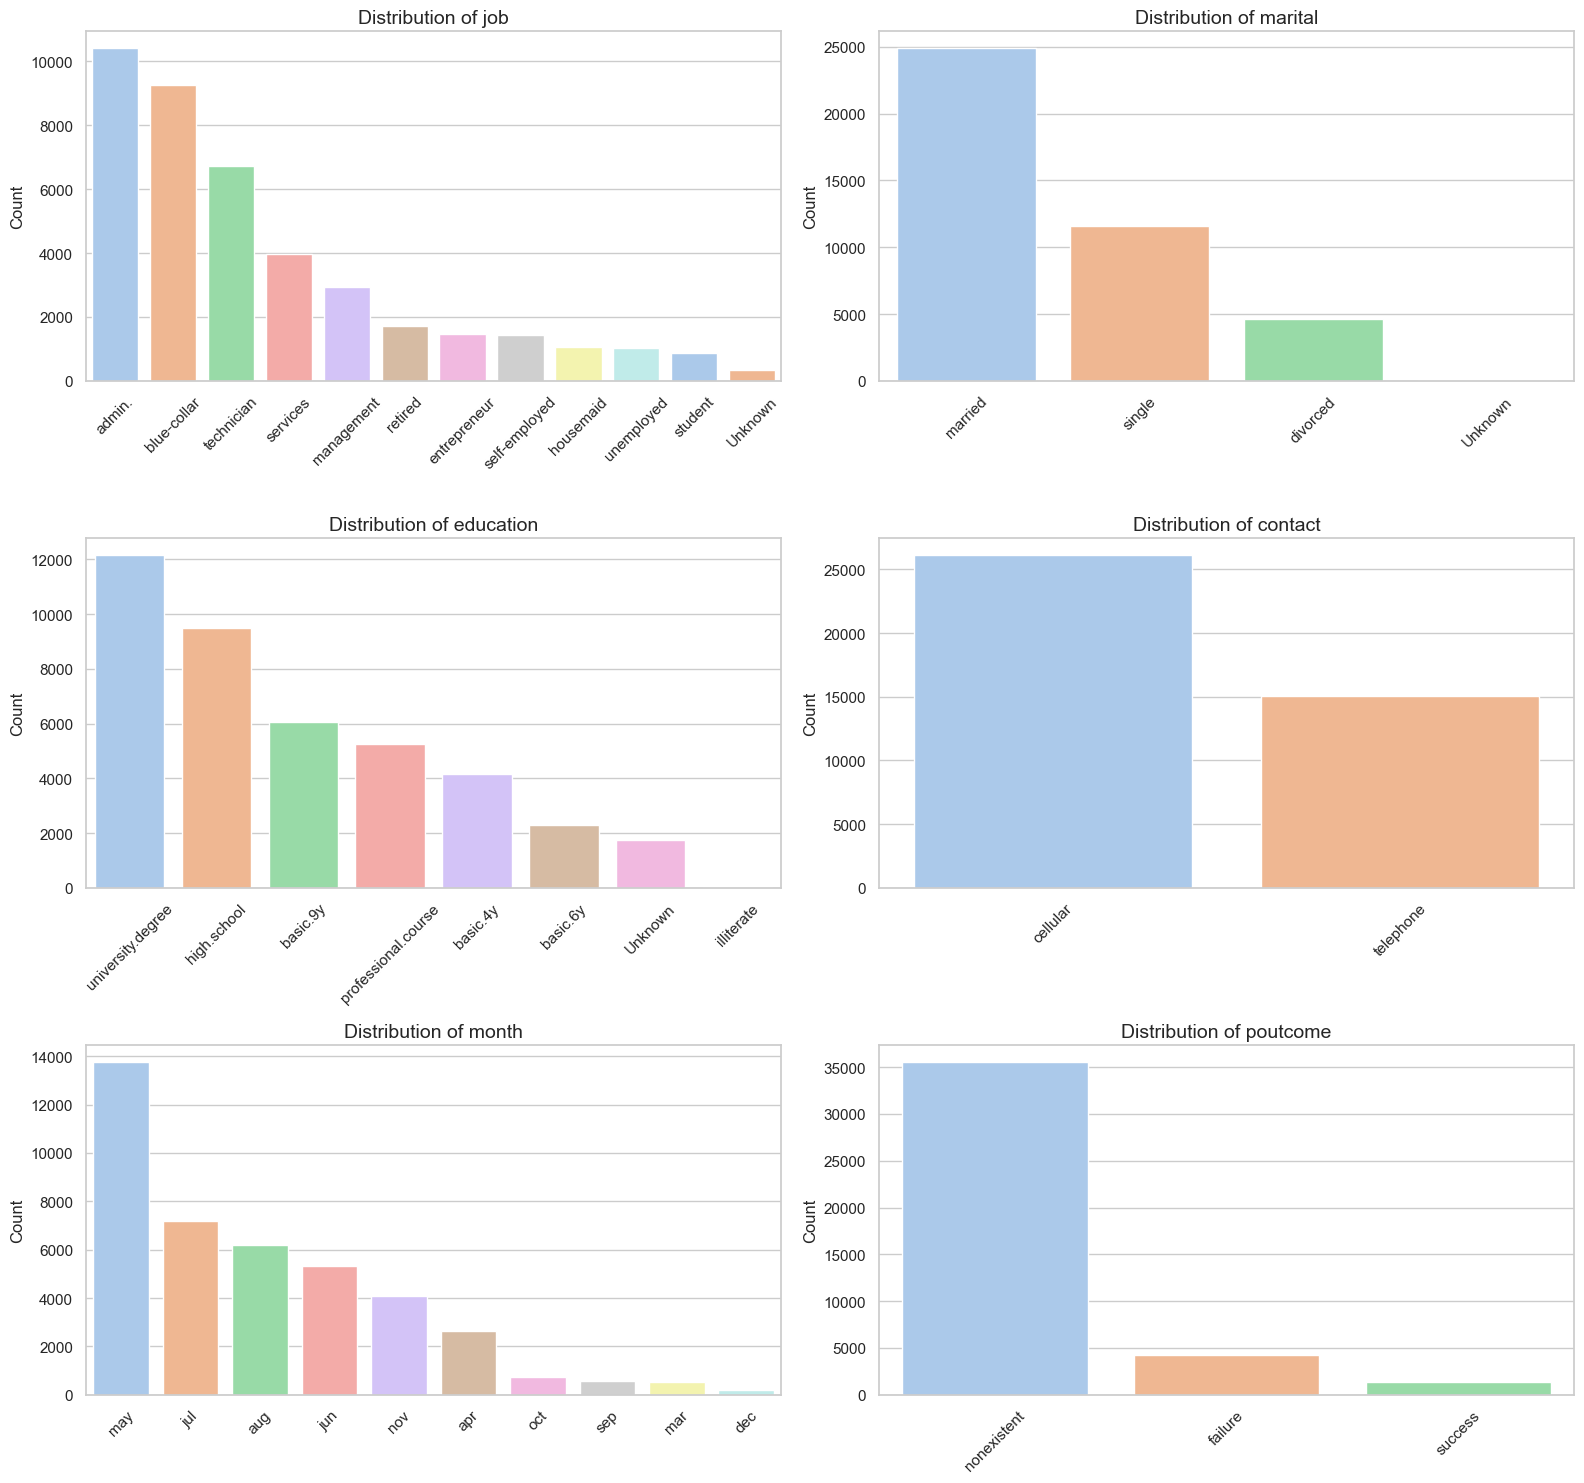

In [20]:
# Select a few key categorical columns for bar plot visualization
categorical_features_to_plot = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

# Set up the plot area
fig, axes = plt.subplots(3, 2, figsize=(16, 15))
axes = axes.flatten()

# Generate count plots for each selected categorical feature
for i, col in enumerate(categorical_features_to_plot):
    sns.countplot(data=df_cleaned, x=col, ax=axes[i], order=df_cleaned[col].value_counts().index, palette='pastel')
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


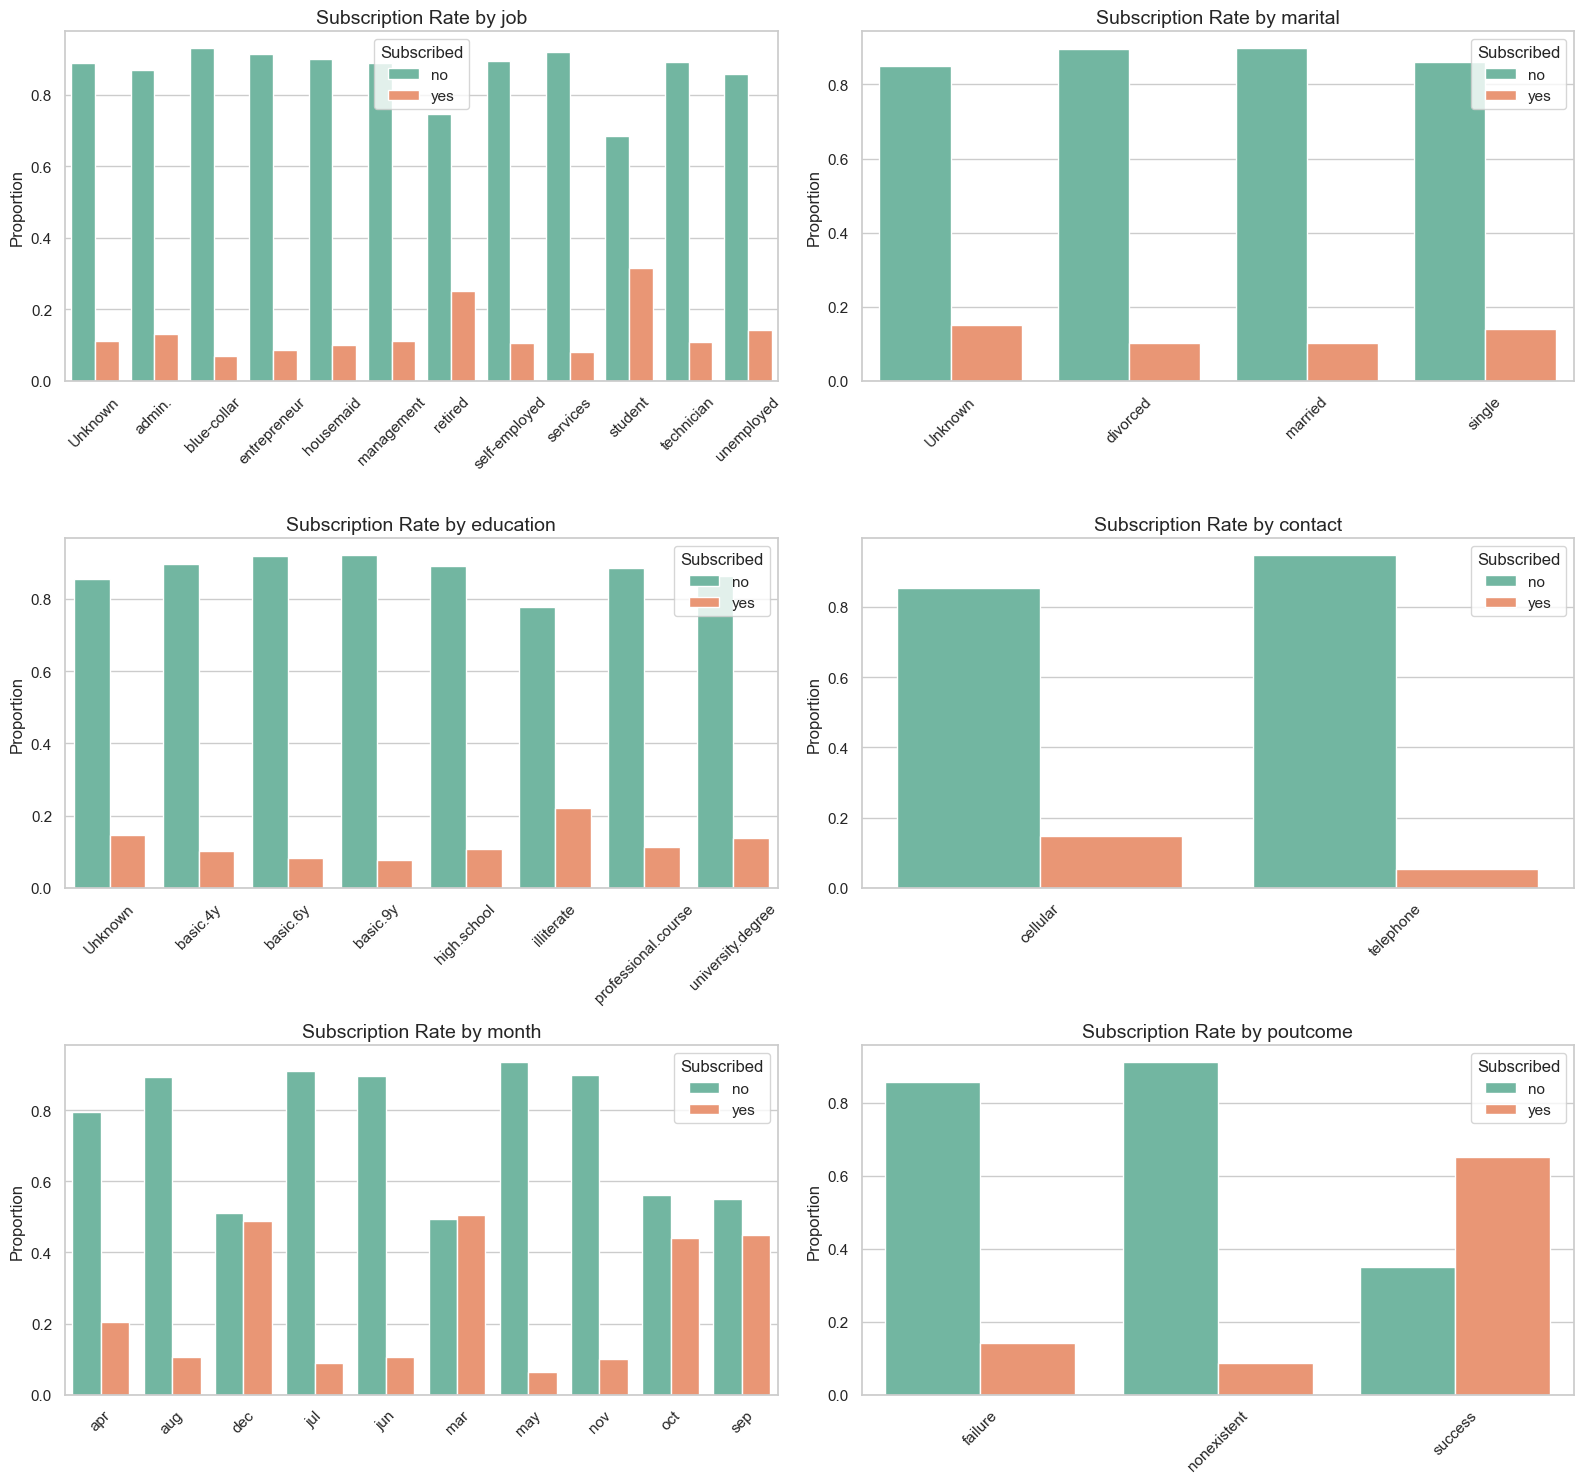

In [21]:
# Plot how each category affects the target variable 'y' (subscription outcome)
fig, axes = plt.subplots(3, 2, figsize=(16, 15))
axes = axes.flatten()

# Create bar plots showing the proportion of 'yes' and 'no' within each category
for i, col in enumerate(categorical_features_to_plot):
    prop_df = df_cleaned.groupby([col, 'y']).size().reset_index(name='count')
    prop_total = prop_df.groupby(col)['count'].transform('sum')
    prop_df['percentage'] = prop_df['count'] / prop_total

    sns.barplot(data=prop_df, x=col, y='percentage', hue='y', ax=axes[i], palette='Set2')
    axes[i].set_title(f'Subscription Rate by {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Proportion')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Subscribed')

plt.tight_layout()
plt.show()


# Converting Categorical Column into 0's and 1's using One Hot Encoding

In [22]:
# Select all categorical columns (object type)
categorical_cols = df_cleaned.select_dtypes(include='object').columns.tolist()

# Remove the target column 'y' from this list
categorical_cols.remove('y')

# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)




In [23]:
# Preview the first few rows of the encoded DataFrame
df_encoded.head(3)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


In [24]:
# Display the first few rows of the dataset
df_encoded.shape

(41176, 57)

In [ ]:
# Finalize feature matrix X and target vector y

# Use the encoded DataFrame
# Separate features and target
X = df_encoded.drop(columns=['y'])
y = df_encoded['y'].apply(lambda val: 1 if val == 'yes' else 0)  # Convert target to binary (1=yes, 0=no)

# Show shapes and preview
X_shape = X.shape
y_distribution = y.value_counts(normalize=True)

X_shape, y_distribution


((41176, 56),
 0    0.887337
 1    0.112663
 Name: y, dtype: float64)

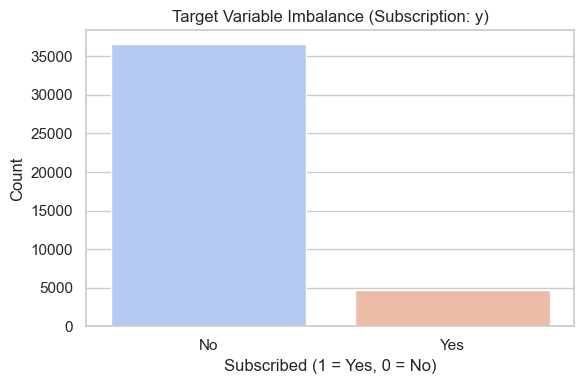

In [26]:
# Visualize target class imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='coolwarm')
plt.title('Target Variable Imbalance (Subscription: y)')
plt.xlabel('Subscribed (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()


In [27]:
# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  # preserve class distribution


# Show shapes
X_train.shape, X_test.shape, y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)


((32940, 56),
 (8236, 56),
 0    0.887341
 1    0.112659
 Name: y, dtype: float64,
 0    0.887324
 1    0.112676
 Name: y, dtype: float64)

# Model Training with Logistic Regression

In [28]:
# Identify numeric columns to scale
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns



In [29]:
# Initialize scaler
scaler = StandardScaler()



In [30]:
# Apply scaler to training and test data (fit on train, transform both)
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])



In [31]:
# Re-train Logistic Regression with scaled data
logreg_scaled = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = logreg_scaled.predict(X_test_scaled)



In [32]:
# Classification report and confusion matrix
report_scaled = classification_report(y_test, y_pred_scaled, output_dict=False)
cm_scaled = confusion_matrix(y_test, y_pred_scaled)
disp_scaled = ConfusionMatrixDisplay(confusion_matrix=cm_scaled, display_labels=['No', 'Yes'])



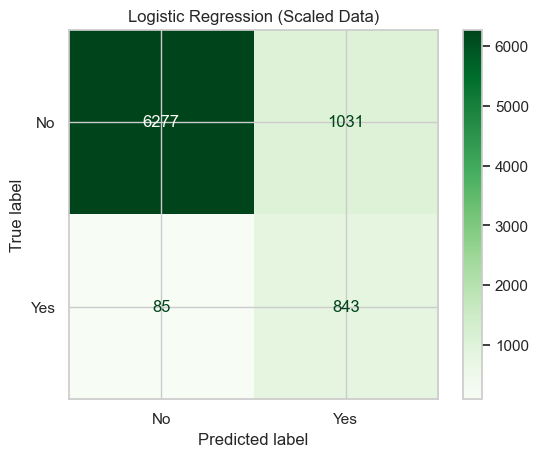

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      7308
           1       0.45      0.91      0.60       928

    accuracy                           0.86      8236
   macro avg       0.72      0.88      0.76      8236
weighted avg       0.93      0.86      0.88      8236



In [33]:
# Plot confusion matrix
disp_scaled.plot(cmap='Greens')
plt.title('Logistic Regression (Scaled Data)')
plt.show()

# Print classification report
print(report_scaled)


# Model Training with Random Forest

In [34]:


# Initialize Random Forest with class weights to handle imbalance
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)



In [35]:
# Train the model
rf_model.fit(X_train, y_train)






RandomForestClassifier(class_weight='balanced', random_state=42)

In [36]:
# Predict on test data
y_pred_rf = rf_model.predict(X_test)





In [37]:
# Evaluation
rf_report = classification_report(y_test, y_pred_rf, output_dict=False)
rf_cm = confusion_matrix(y_test, y_pred_rf)
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=['No', 'Yes'])







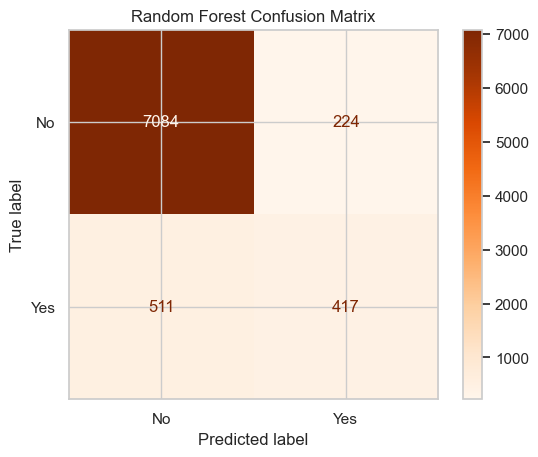

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7308
           1       0.65      0.45      0.53       928

    accuracy                           0.91      8236
   macro avg       0.79      0.71      0.74      8236
weighted avg       0.90      0.91      0.90      8236



In [38]:
# Plot confusion matrix
rf_disp.plot(cmap='Oranges')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Print classification report
print(rf_report)






# Checking Logistic regression for Overfitting and under fitting

In [39]:
# Predict on train and test sets
y_train_pred_log = logreg_scaled.predict(X_train_scaled)
y_test_pred_log = logreg_scaled.predict(X_test_scaled)

# Compute classification reports
logreg_train_report = classification_report(y_train, y_train_pred_log, output_dict=True)
logreg_test_report = classification_report(y_test, y_test_pred_log, output_dict=True)

# Convert to DataFrames and round
logreg_train_df = pd.DataFrame(logreg_train_report).transpose().round(2)
logreg_test_df = pd.DataFrame(logreg_test_report).transpose().round(2)

# Display 
display(logreg_train_df)
display(logreg_test_df)


,precision,recall,f1-score,support
0,0.98,0.86,0.92,29229.00
1,0.44,0.89,0.59,3711.00
accuracy,0.86,0.86,0.86,0.86
macro avg,0.71,0.87,0.75,32940.00
weighted avg,0.92,0.86,0.88,32940.00


,precision,recall,f1-score,support
0,0.99,0.86,0.92,7308.00
1,0.45,0.91,0.60,928.00
accuracy,0.86,0.86,0.86,0.86
macro avg,0.72,0.88,0.76,8236.00
weighted avg,0.93,0.86,0.88,8236.00


# Observation made after comparison
-  Very similar performance on both train and test sets

- No major performance drop from train to test

- Precision is low, but balanced across both sets

- Recall for class 1 is high in both (great for finding subscribers)

- This indicates that the model is generalizing well

# Checking Random Forest for Overfitting and Under fitting

In [40]:

# Predict on train and test sets for Random Forest
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Compute classification reports
rf_train_report = classification_report(y_train, y_train_pred_rf, output_dict=True)
rf_test_report = classification_report(y_test, y_test_pred_rf, output_dict=True)

# Convert to DataFrames and round
rf_train_df = pd.DataFrame(rf_train_report).transpose().round(2)
rf_test_df = pd.DataFrame(rf_test_report).transpose().round(2)

# Display 
display(rf_train_df)
display(rf_test_df)


,precision,recall,f1-score,support
0,1.0,1.0,1.0,29229.0
1,1.0,1.0,1.0,3711.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,32940.0
weighted avg,1.0,1.0,1.0,32940.0


,precision,recall,f1-score,support
0,0.93,0.97,0.95,7308.00
1,0.65,0.45,0.53,928.00
accuracy,0.91,0.91,0.91,0.91
macro avg,0.79,0.71,0.74,8236.00
weighted avg,0.90,0.91,0.90,8236.00


# observation made after comparison
- Training performance is perfect (1.00 across the board) → strong sign of overfitting

- Test performance drops, especially for class 1 (yes):

- Recall: 0.45

- F1: 0.53

- Model memorized training data, but struggles to generalize to unseen data, especially for identifying true subscribers.

# Feature Importance

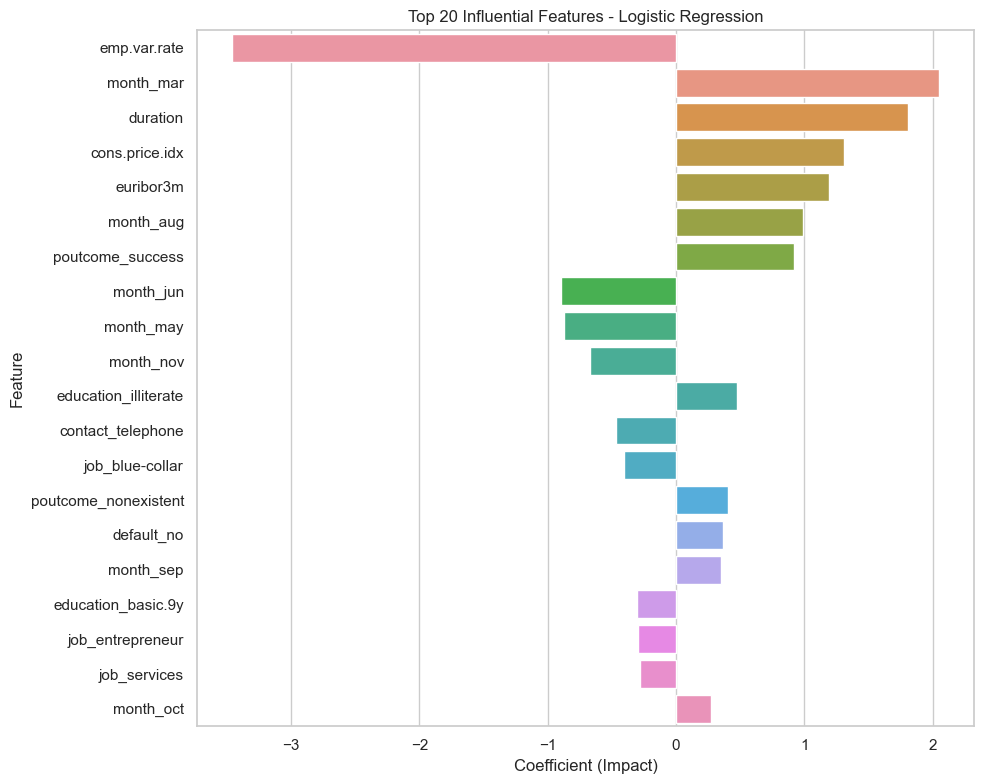

In [41]:
# Get feature coefficients from logistic regression
coefficients = logreg_scaled.coef_[0]
features = X.columns

# Create DataFrame for visualization
logreg_importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Plot top 20 features by absolute coefficient magnitude
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=logreg_importance_df.head(20))
plt.title('Top 20 Influential Features - Logistic Regression')
plt.xlabel('Coefficient (Impact)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


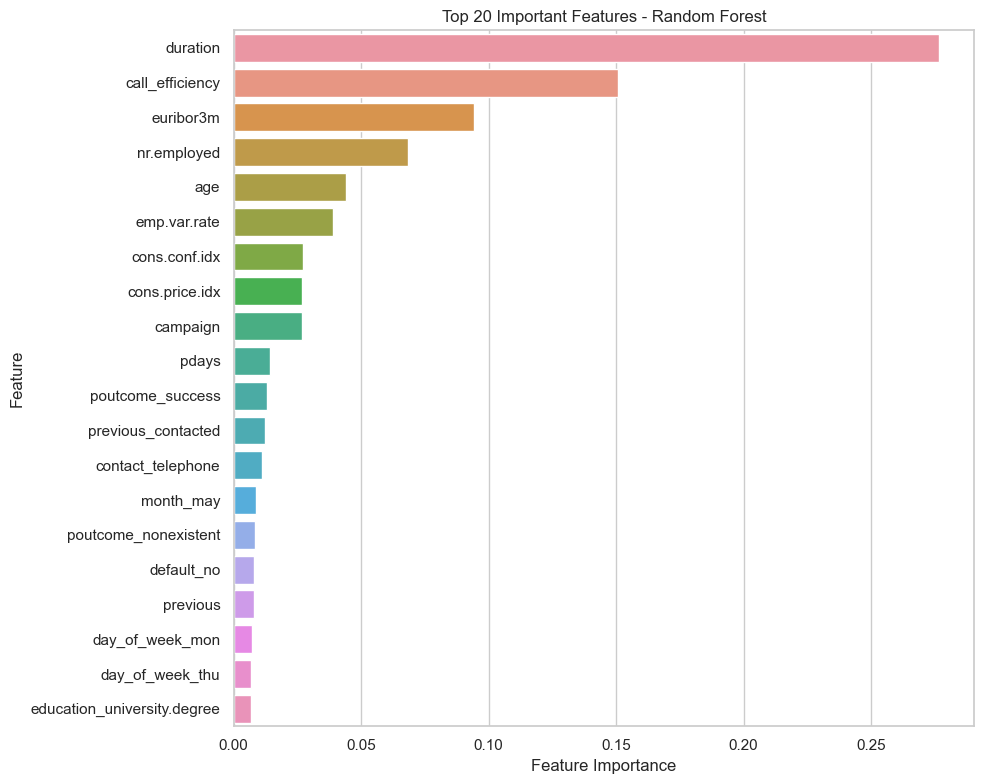

In [42]:
# Extract feature importances from the trained Random Forest model
importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for better sorting and visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 20 important features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Top 20 Important Features - Random Forest')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


# Creating Preprocessing Pipeline for deployment of Predictive Model

In [58]:
# Create a preprocessing pipeline for the entire dataset
categorical_cols = df_cleaned.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('y')
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create the preprocessing transformer
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
])

# Pipeline: preprocess then classify

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000))
])

# Fit pipeline on original df_cleaned (X, y)
X_full = df_cleaned.drop(columns=['y'])
y_full = df_cleaned['y'].apply(lambda val: 1 if val == 'yes' else 0)

pipeline.fit(X_full, y_full)

# Save the pipeline
with open('logreg_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

print("Pipeline trained and saved as logreg_pipeline.pkl")


Pipeline trained and saved as logreg_pipeline.pkl


# Saving model for Deployment

In [43]:
import pickle
with open('logreg_model.pkl', 'wb') as model_file:
    pickle.dump(logreg_scaled, model_file)

#  Save the scaler for consistent preprocessing
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and scaler saved successfully.")

Model and scaler saved successfully.


In [60]:

with open('logreg_pipeline.pkl', 'rb') as f:
    pipeline = pickle.load(f)

